In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import numpy as np
import json
from collections import defaultdict

# Symbolic execution results

In [2]:
labels = ['bancteian', 'ircbot', 'sillyp2p', 'sytro', 'simbot', 'FeakerStealer', 'sfone', 
          'lamer', 'RedLineStealer', 'RemcosRAT', 'Sodinokibi', 'delf', 'gandcrab', 'wabot', 'mirai']

methods= ['CSTOCH', 'CSTOCH2', 'CSTOCHSET2', 'STOCH', 'WSELECT', 'WSELECT2', 'WSELECTSET2', 'CDFS', 'CBFS']

df_original = pd.read_csv('./measurements.csv')
print(df_original)

     expl_method     family  \
0         CSTOCH  bancteian   
1        CSTOCH2  bancteian   
2     CSTOCHSET2  bancteian   
3          STOCH  bancteian   
4        WSELECT  bancteian   
...          ...        ...   
6476     CSTOCH2  RemcosRAT   
6477  CSTOCHSET2  RemcosRAT   
6478       STOCH  RemcosRAT   
6479      CSTOCH  RemcosRAT   
6480     CSTOCH2  RemcosRAT   

                                          nameFileShort  tot_syscalls  \
0                      00013b0490c8d79ad771da5d99544dc2          2377   
1                      00013b0490c8d79ad771da5d99544dc2          2398   
2                      00013b0490c8d79ad771da5d99544dc2           297   
3                      00013b0490c8d79ad771da5d99544dc2          2265   
4                      00013b0490c8d79ad771da5d99544dc2           323   
...                                                 ...           ...   
6476  0789e8d80d058cc3283d3041953b057ccf252b88263098...           587   
6477  0789e8d80d058cc3283d3041953b057ccf252

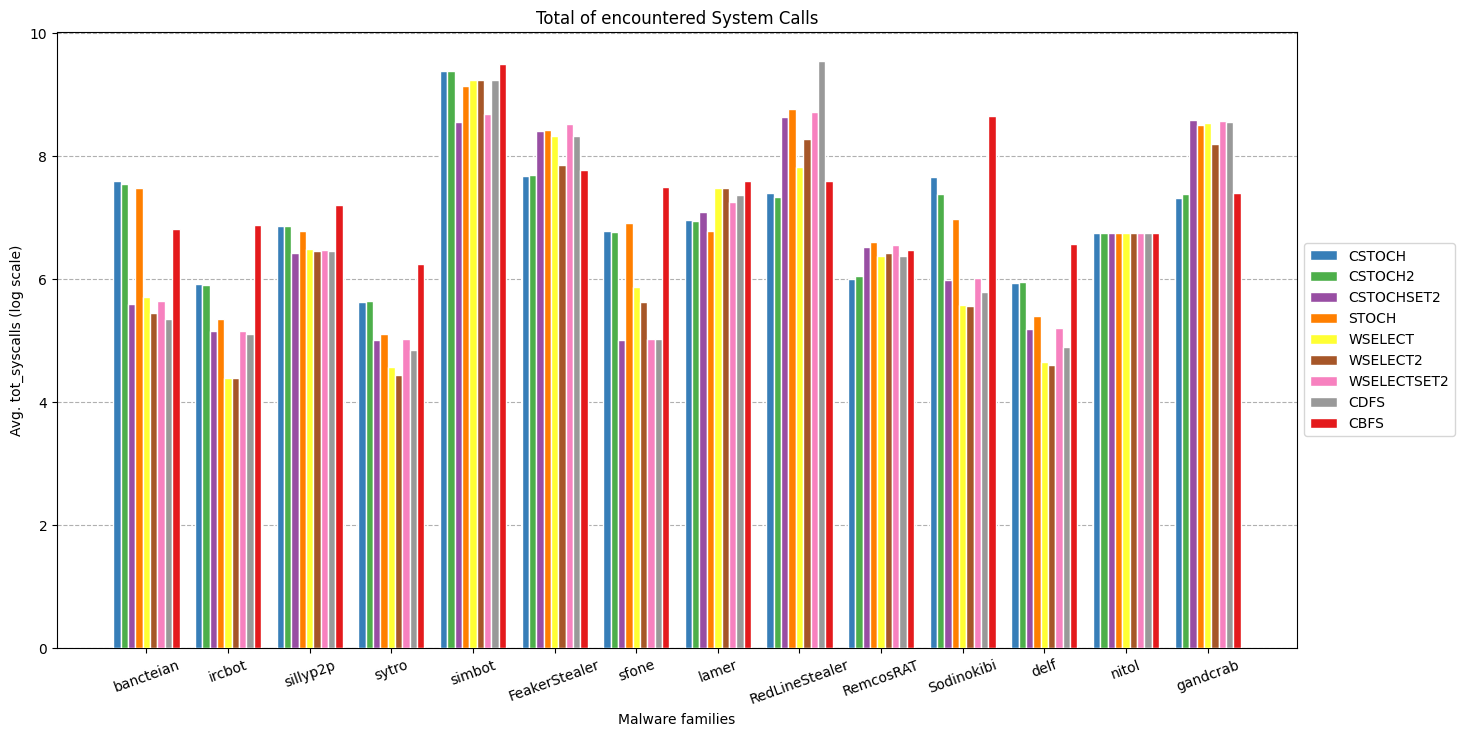

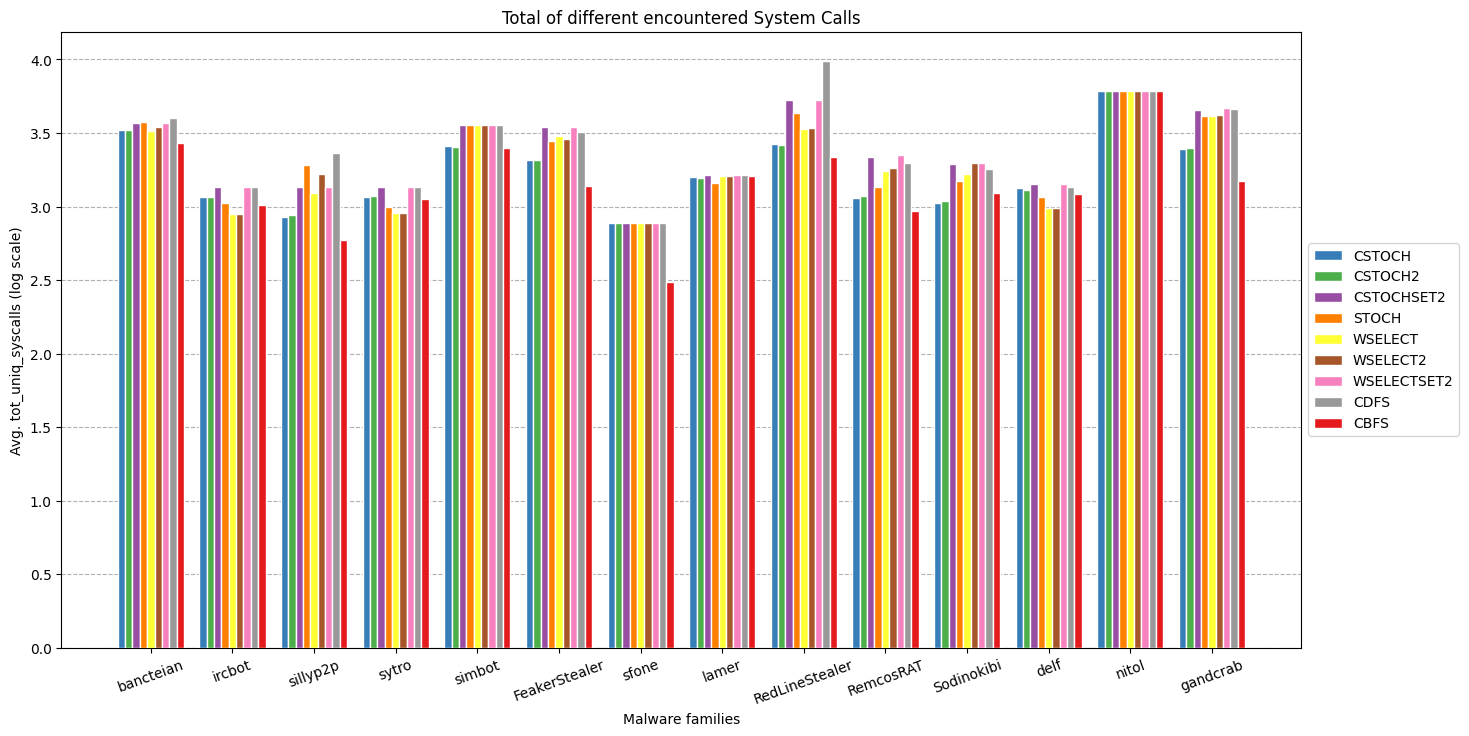

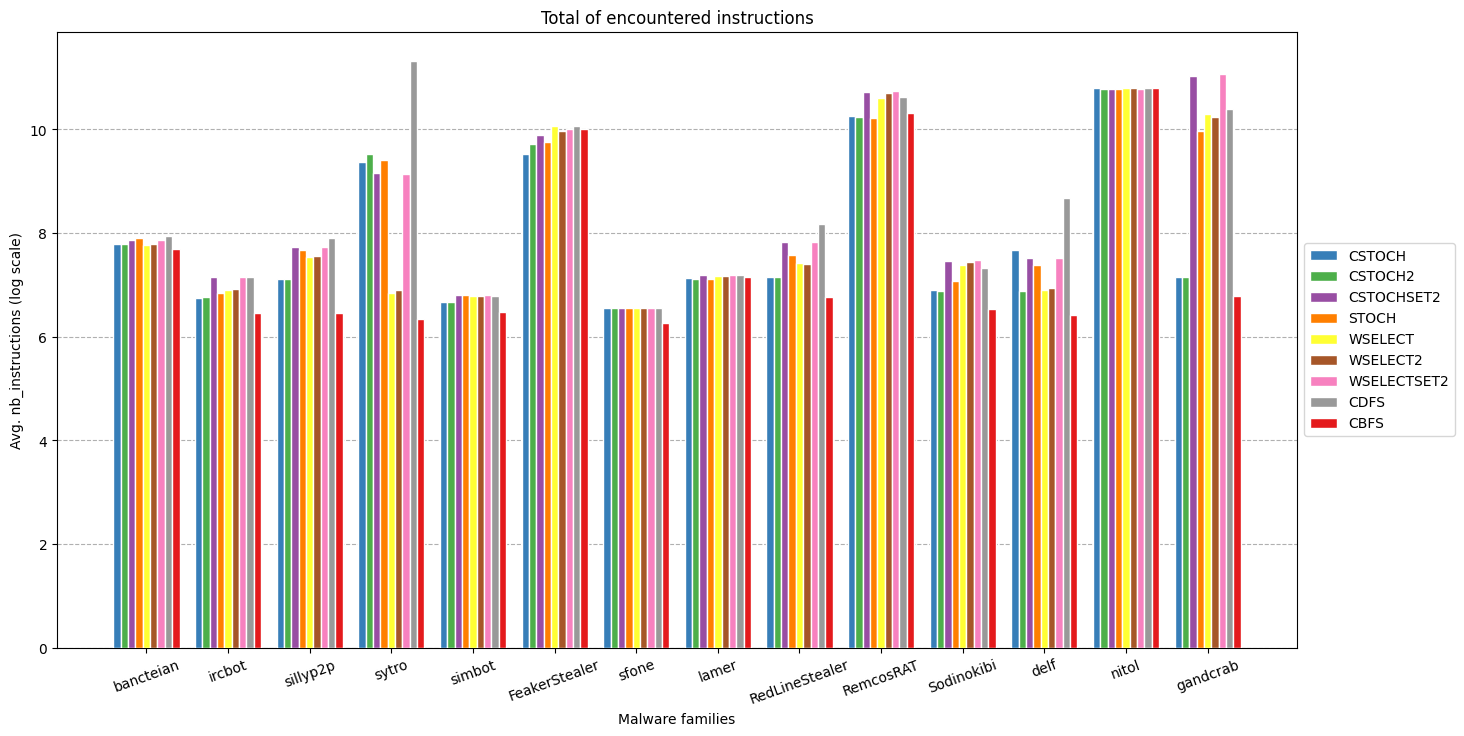

In [3]:
metrics = ["tot_syscalls","tot_uniq_syscalls", "nb_instructions"]

fams = ['bancteian', 'ircbot', 'sillyp2p', 'sytro', 'simbot', 'FeakerStealer', 'sfone', 
        'lamer', 'RedLineStealer', 'RemcosRAT', 'Sodinokibi', 'delf', 'nitol', 'gandcrab']
# for f in labels:
# #     vals = df.loc[(df["expl_method"]==m) & (df["family"]==f)]["tot_syscalls"].mean()+
# fam = df.loc[df["family"]==f]

x = np.arange(len(fams))
for i in range(1, len(x)):
    x[i] = x[i-1] + 2
# print(x)

titles = {"tot_syscalls": "Total of encountered System Calls",
          "tot_uniq_syscalls":"Total of different encountered System Calls",
          "nb_instructions":"Total of encountered instructions"}
# df = df_original.loc[df_original["elapsed_time"] <= 800]

df = df_original.loc[((df_original["elapsed_time"] <= 700) & (df_original["elapsed_time"] >= 100))]

for metric in metrics:
    plt.figure(figsize=(16,8))
    plt.grid(axis='y', linestyle="dashed", zorder=0)
    y1 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH"][metric].mean() for f in fams]
    y2 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH2"][metric].mean() for f in fams]
    y3 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCHSET2"][metric].mean() for f in fams]
    y4 = [df.loc[df["family"]==f].loc[df["expl_method"]=="STOCH"][metric].mean() for f in fams]
    y5 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT"][metric].mean() for f in fams]
    y6 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT2"][metric].mean() for f in fams]
    y7 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECTSET2"][metric].mean() for f in fams]
    y8 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CDFS"][metric].mean() for f in fams]
    y9 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CBFS"][metric].mean() for f in fams]    
    width = 0.18
#     space = 0.05
    # plot data in grouped manner of bar type
    plt.bar(x-4*(width), np.log(y1), width, zorder=3, color="#377eb8", edgecolor='white')
    plt.bar(x-3*(width), np.log(y2), width, zorder=3, color="#4daf4a", edgecolor='white')
    plt.bar(x-2*(width), np.log(y3), width, zorder=3, color="#984ea3", edgecolor='white')
    plt.bar(x-width, np.log(y4), width, zorder=3, color="#ff7f00", edgecolor='white')
    plt.bar(x, np.log(y5), width, zorder=3, color="#ffff33", edgecolor='white')
    plt.bar(x+width, np.log(y6), width, zorder=3, color="#a65628", edgecolor='white')
    plt.bar(x+2*(width), np.log(y7), width, zorder=3, color="#f781bf", edgecolor='white')
    plt.bar(x+3*(width), np.log(y8), width, zorder=3, color="#999999", edgecolor='white')
    plt.bar(x+4*(width), np.log(y9), width, zorder=3, color="#e41a1c", edgecolor='white')
    plt.xticks(x, fams)
    plt.xlabel("Malware families")
    plt.ylabel("Avg. "+ metric + " (log scale)")
#     plt.legend(methods)
#     plt.legend(methods, loc='upper center', bbox_to_anchor=(0.5, -0.17),
#           fancybox=True, shadow=True, ncol=5)

    plt.legend(methods, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation = 20)
    plt.title(titles[metric])
    plt.savefig(metric+".svg", bbox_inches = 'tight')
    plt.show()
    
    

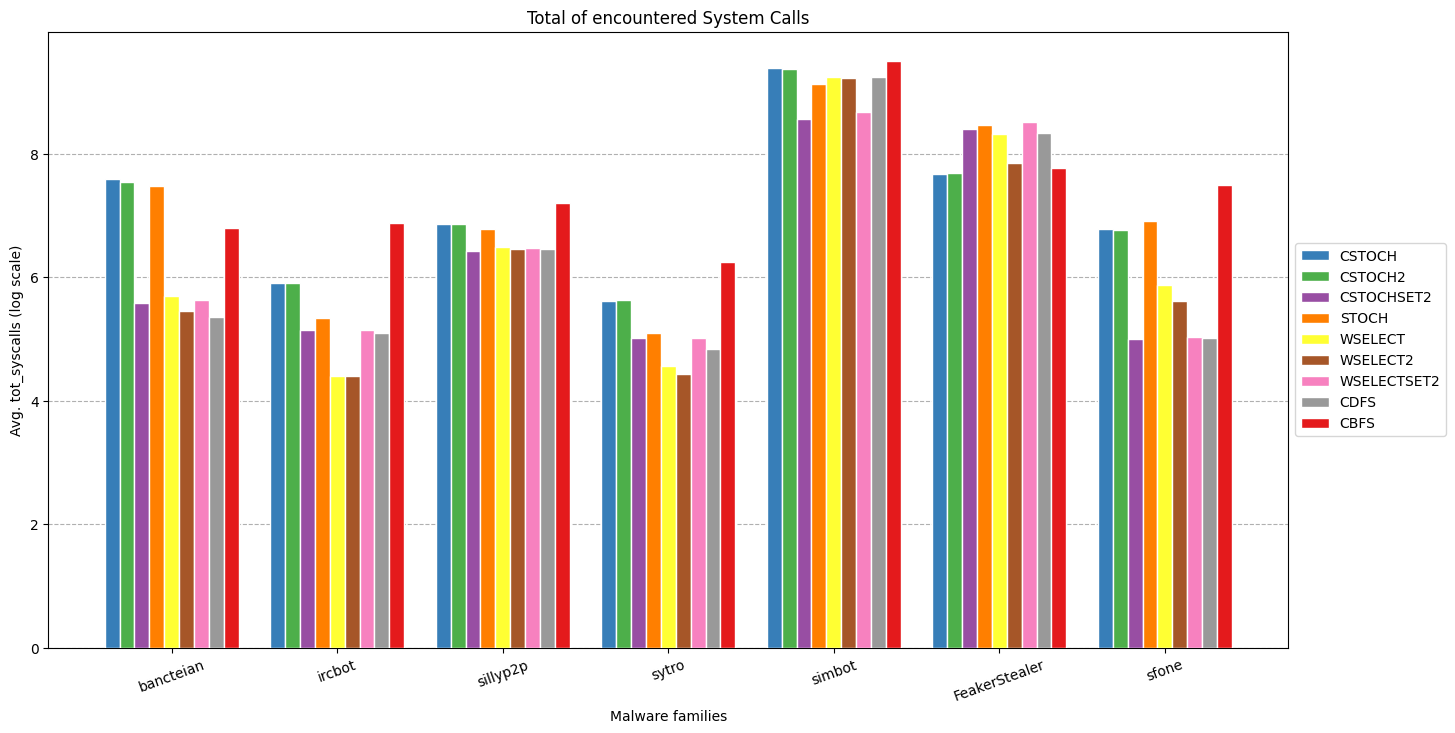

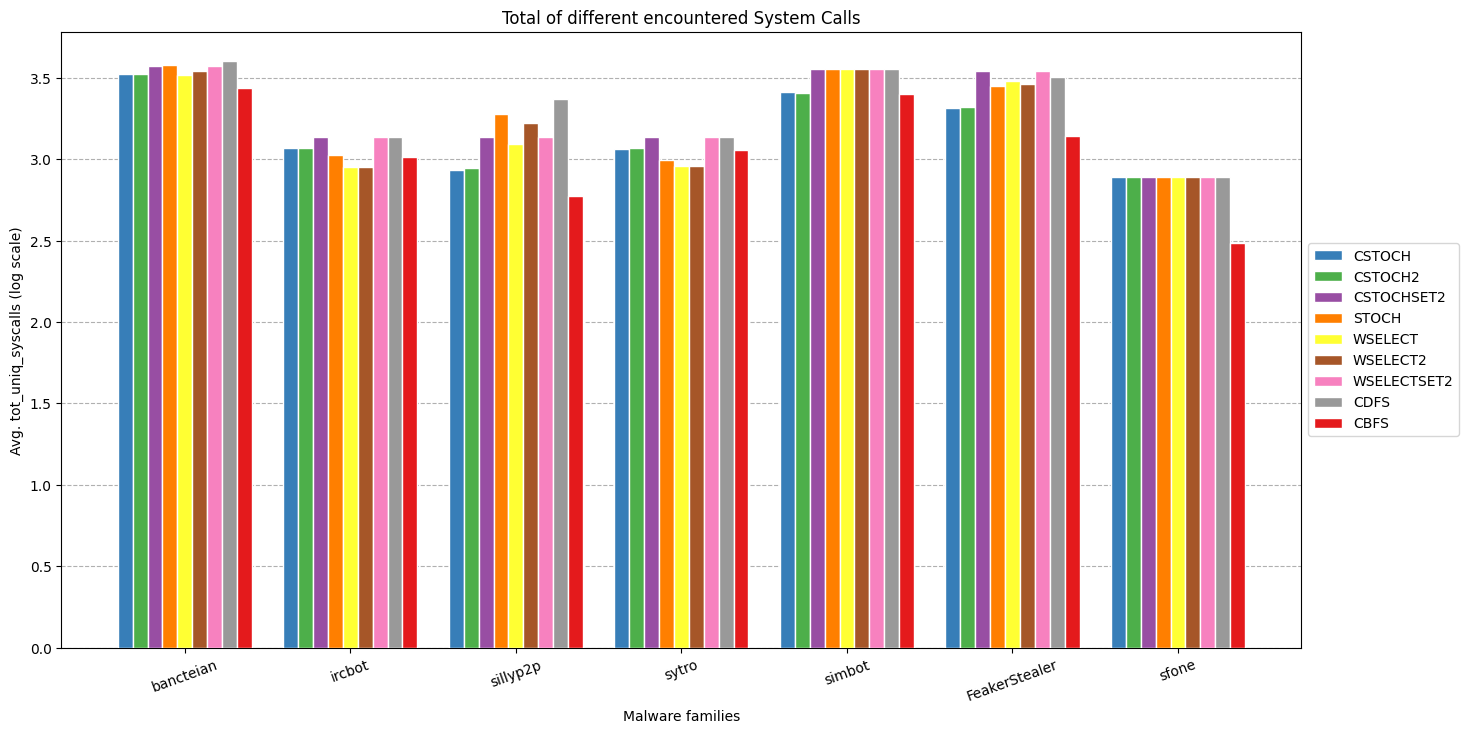

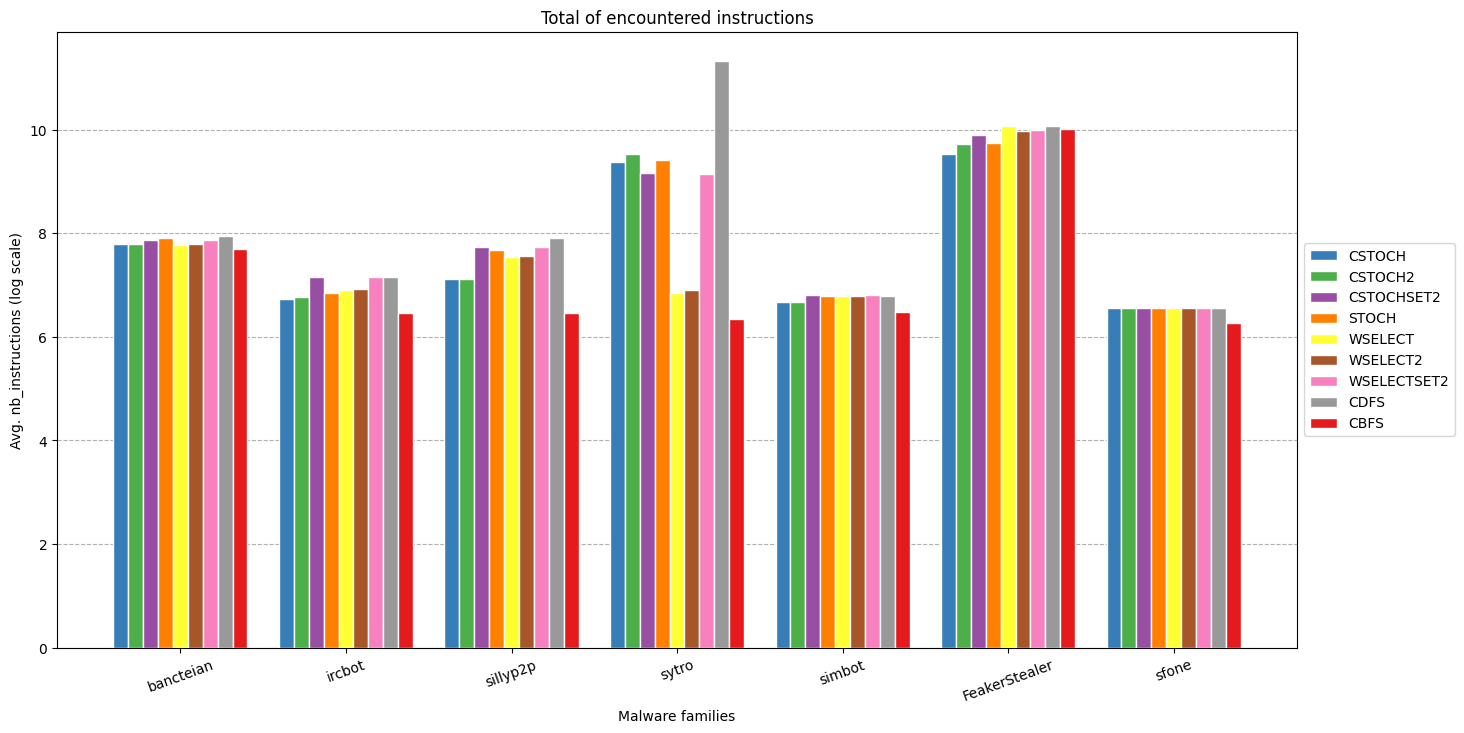

In [4]:
metrics = ["tot_syscalls","tot_uniq_syscalls", "nb_instructions"]

fams = ['bancteian', 'ircbot', 'sillyp2p', 'sytro', 'simbot', 'FeakerStealer', 'sfone']
#         'lamer', 'RedLineStealer', 'RemcosRAT', 'Sodinokibi', 'delf']
# for f in labels:
# #     vals = df.loc[(df["expl_method"]==m) & (df["family"]==f)]["tot_syscalls"].mean()+
# fam = df.loc[df["family"]==f]

x = np.arange(len(fams))
for i in range(1, len(x)):
    x[i] = x[i-1] + 2
# print(x)

titles = {"tot_syscalls": "Total of encountered System Calls",
          "tot_uniq_syscalls":"Total of different encountered System Calls",
          "nb_instructions":"Total of encountered instructions"}
# df = df_original.loc[df_original["elapsed_time"] <= 800]

df = df_original.loc[((df_original["elapsed_time"] <= 800) & (df_original["elapsed_time"] >= 300))]

for metric in metrics:
    plt.figure(figsize=(16,8))
    plt.grid(axis='y', linestyle="dashed", zorder=0)
    y1 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH"][metric].mean() for f in fams]
    y2 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH2"][metric].mean() for f in fams]
    y3 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCHSET2"][metric].mean() for f in fams]
    y4 = [df.loc[df["family"]==f].loc[df["expl_method"]=="STOCH"][metric].mean() for f in fams]
    y5 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT"][metric].mean() for f in fams]
    y6 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT2"][metric].mean() for f in fams]
    y7 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECTSET2"][metric].mean() for f in fams]
    y8 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CDFS"][metric].mean() for f in fams]
    y9 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CBFS"][metric].mean() for f in fams]    
    width = 0.18
#     space = 0.05
    # plot data in grouped manner of bar type
    plt.bar(x-4*(width), np.log(y1), width, zorder=3, color="#377eb8", edgecolor='white')
    plt.bar(x-3*(width), np.log(y2), width, zorder=3, color="#4daf4a", edgecolor='white')
    plt.bar(x-2*(width), np.log(y3), width, zorder=3, color="#984ea3", edgecolor='white')
    plt.bar(x-width, np.log(y4), width, zorder=3, color="#ff7f00", edgecolor='white')
    plt.bar(x, np.log(y5), width, zorder=3, color="#ffff33", edgecolor='white')
    plt.bar(x+width, np.log(y6), width, zorder=3, color="#a65628", edgecolor='white')
    plt.bar(x+2*(width), np.log(y7), width, zorder=3, color="#f781bf", edgecolor='white')
    plt.bar(x+3*(width), np.log(y8), width, zorder=3, color="#999999", edgecolor='white')
    plt.bar(x+4*(width), np.log(y9), width, zorder=3, color="#e41a1c", edgecolor='white')
    plt.xticks(x, fams)
    plt.xlabel("Malware families")
    plt.ylabel("Avg. "+ metric + " (log scale)")
#     plt.legend(methods)
#     plt.legend(methods, loc='upper center', bbox_to_anchor=(0.5, -0.17),
#           fancybox=True, shadow=True, ncol=5)

    plt.legend(methods, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation = 20)
    plt.title(titles[metric])
    plt.savefig(metric+".svg", bbox_inches = 'tight')
    plt.show()

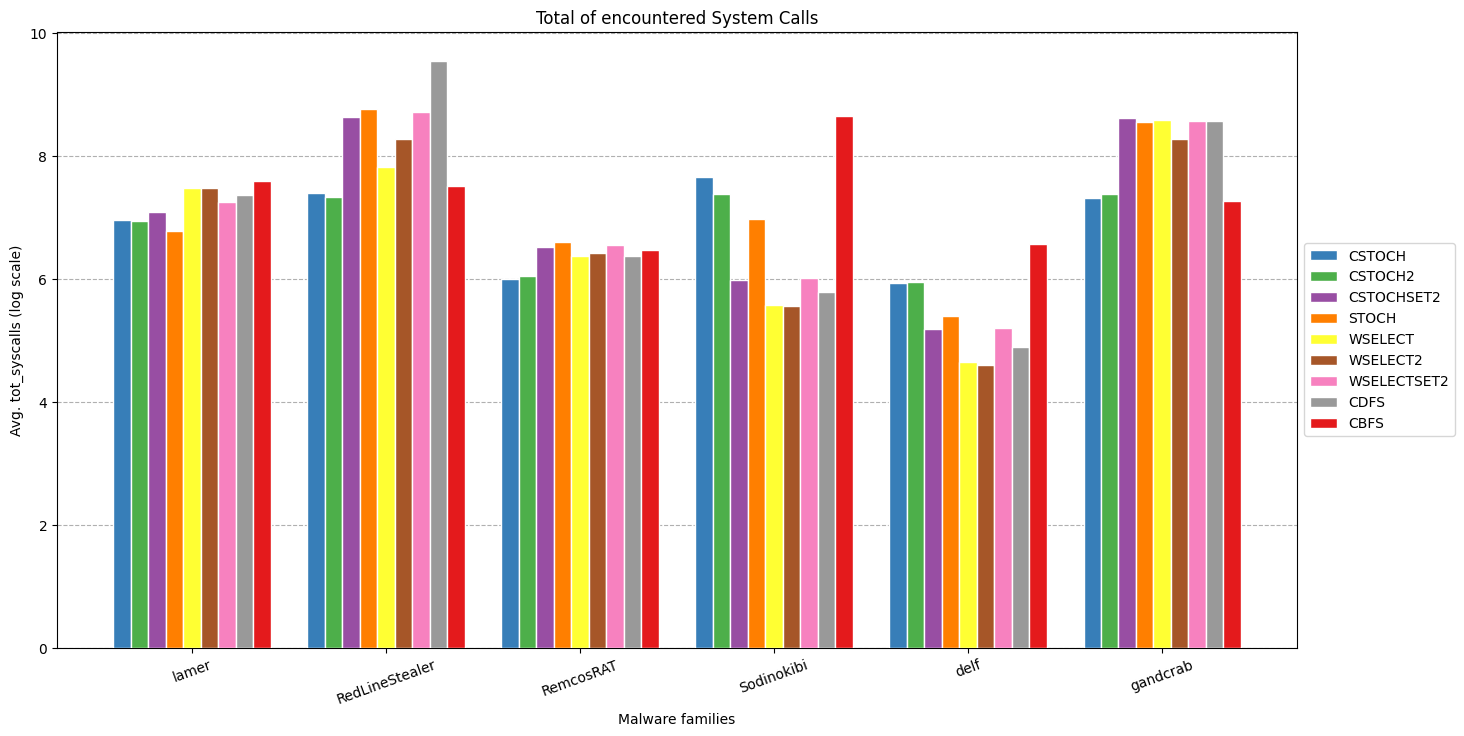

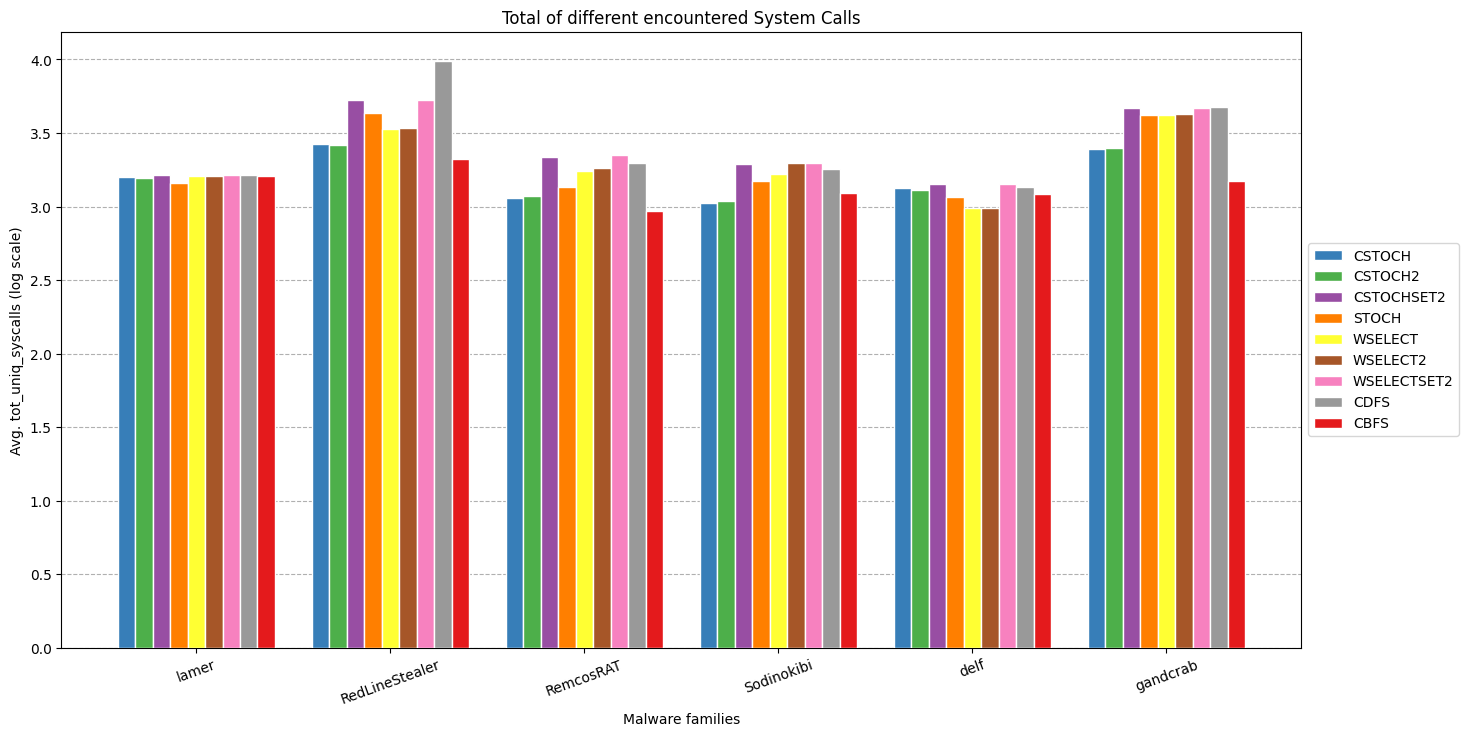

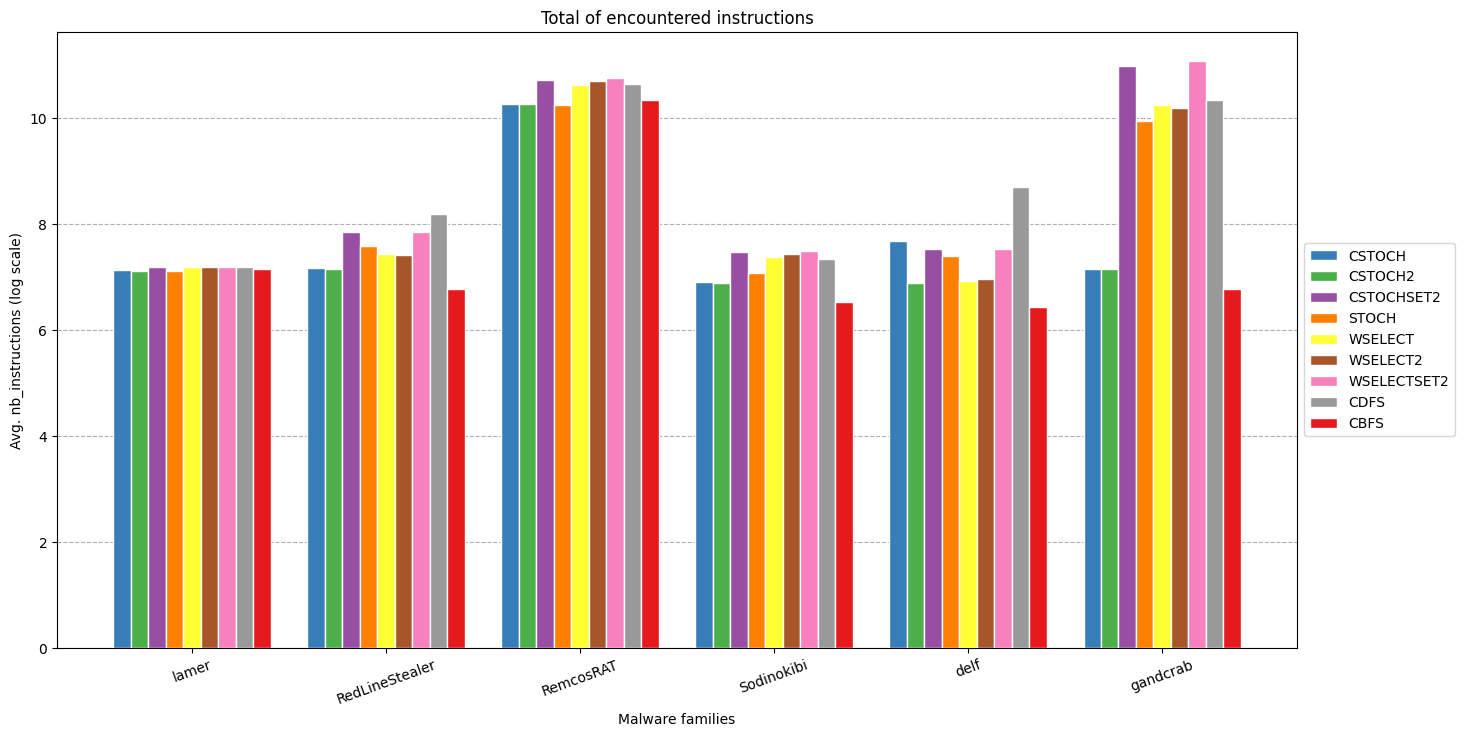

In [5]:
metrics = ["tot_syscalls","tot_uniq_syscalls", "nb_instructions"]

fams = [#'bancteian', 'ircbot', 'sillyp2p', 'sytro', 'simbot', 'FeakerStealer', 'sfone', 
        'lamer', 'RedLineStealer', 'RemcosRAT', 'Sodinokibi', 'delf', 'gandcrab',]
# for f in labels:
# #     vals = df.loc[(df["expl_method"]==m) & (df["family"]==f)]["tot_syscalls"].mean()+
# fam = df.loc[df["family"]==f]

x = np.arange(len(fams))
for i in range(1, len(x)):
    x[i] = x[i-1] + 2
# print(x)

titles = {"tot_syscalls": "Total of encountered System Calls",
          "tot_uniq_syscalls":"Total of different encountered System Calls",
          "nb_instructions":"Total of encountered instructions"}
# df = df_original.loc[df_original["elapsed_time"] <= 800]

df = df_original.loc[((df_original["elapsed_time"] <= 800) & (df_original["elapsed_time"] >= 300))]

for metric in metrics:
    plt.figure(figsize=(16,8))
    plt.grid(axis='y', linestyle="dashed", zorder=0)
    y1 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH"][metric].mean() for f in fams]
    y2 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH2"][metric].mean() for f in fams]
    y3 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCHSET2"][metric].mean() for f in fams]
    y4 = [df.loc[df["family"]==f].loc[df["expl_method"]=="STOCH"][metric].mean() for f in fams]
    y5 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT"][metric].mean() for f in fams]
    y6 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT2"][metric].mean() for f in fams]
    y7 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECTSET2"][metric].mean() for f in fams]
    y8 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CDFS"][metric].mean() for f in fams]
    y9 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CBFS"][metric].mean() for f in fams]    
    width = 0.18
#     space = 0.05
    # plot data in grouped manner of bar type
    plt.bar(x-4*(width), np.log(y1), width, zorder=3, color="#377eb8", edgecolor='white')
    plt.bar(x-3*(width), np.log(y2), width, zorder=3, color="#4daf4a", edgecolor='white')
    plt.bar(x-2*(width), np.log(y3), width, zorder=3, color="#984ea3", edgecolor='white')
    plt.bar(x-width, np.log(y4), width, zorder=3, color="#ff7f00", edgecolor='white')
    plt.bar(x, np.log(y5), width, zorder=3, color="#ffff33", edgecolor='white')
    plt.bar(x+width, np.log(y6), width, zorder=3, color="#a65628", edgecolor='white')
    plt.bar(x+2*(width), np.log(y7), width, zorder=3, color="#f781bf", edgecolor='white')
    plt.bar(x+3*(width), np.log(y8), width, zorder=3, color="#999999", edgecolor='white')
    plt.bar(x+4*(width), np.log(y9), width, zorder=3, color="#e41a1c", edgecolor='white')
    plt.xticks(x, fams)
    plt.xlabel("Malware families")
    plt.ylabel("Avg. "+ metric + " (log scale)")
#     plt.legend(methods)
#     plt.legend(methods, loc='upper center', bbox_to_anchor=(0.5, -0.17),
#           fancybox=True, shadow=True, ncol=5)

    plt.legend(methods, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation = 20)
    plt.title(titles[metric])
    plt.savefig(metric+".svg", bbox_inches = 'tight')
    plt.show()

# Graphs analysis

In [6]:
files = !(ls CSTOCH/0/bancteian | grep SCDG_ | grep .json)

In [7]:
for e in files:
    with open("./CSTOCH/0/bancteian/{}".format(e), "r") as fd:
        print(len(json.load(fd)["links"]))

100
76
173
66
123
104
92
136
95
77
87
103
101
58
119
164
142
136
72
106


In [8]:
# comparer, le nombre de edge, au sein d'une famille, pour chaque méthode
# {fam: {meth: nb, meth: nb, ...}, fam: ...}

In [9]:
data = defaultdict(lambda: defaultdict(lambda: {}))
print(data)

defaultdict(<function <lambda> at 0x7fc5beec4430>, {})


In [12]:
fams = ['bancteian', 'ircbot', 'sillyp2p', 'sytro', 'simbot', 'FeakerStealer', 'sfone', 
        'lamer', 'RedLineStealer', 'RemcosRAT', 'Sodinokibi', 'delf', 'nitol', 'gandcrab']
files = []
for fam in fams:
    for meth in methods:
        for i in range(5):
            path = "{}/{}/{}".format(meth, i, fam)
            tmp_files = !(ls $path | grep SCDG_ | grep .json)
            files.extend(tmp_files)
#         print (files)
            nb_edges = []
            for e in files:
                with open("{}/{}".format(path, e), "r") as fd:
                    nb_edges.append(len(json.load(fd)["links"]))
        print(path)
        print(nb_edges)
        data[fam][meth] = sum(nb_edges)/len(nb_edges)
                

CSTOCH/4/bancteian
[141, 98, 90, 162, 122, 150, 125, 119, 64, 92, 77, 68, 80, 100, 148, 125, 95, 103, 131, 132, 141, 98, 90, 162, 122, 150, 125, 119, 64, 92, 77, 68, 80, 100, 148, 125, 95, 103, 131, 132, 141, 98, 90, 162, 122, 150, 125, 119, 64, 92, 77, 68, 80, 100, 148, 125, 95, 103, 131, 132, 141, 98, 90, 162, 122, 150, 125, 119, 64, 92, 77, 68, 80, 100, 148, 125, 95, 103, 131, 132, 141, 98, 90, 162, 122, 150, 125, 119, 64, 92, 77, 68, 80, 100, 148, 125, 95, 103, 131, 132]
CSTOCH2/4/bancteian
[132, 102, 141, 89, 111, 75, 64, 95, 72, 94, 86, 92, 124, 95, 62, 65, 91, 71, 101, 128, 132, 102, 141, 89, 111, 75, 64, 95, 72, 94, 86, 92, 124, 95, 62, 65, 91, 71, 101, 128, 132, 102, 141, 89, 111, 75, 64, 95, 72, 94, 86, 92, 124, 95, 62, 65, 91, 71, 101, 128, 132, 102, 141, 89, 111, 75, 64, 95, 72, 94, 86, 92, 124, 95, 62, 65, 91, 71, 101, 128, 132, 102, 141, 89, 111, 75, 64, 95, 72, 94, 86, 92, 124, 95, 62, 65, 91, 71, 101, 128, 132, 102, 141, 89, 111, 75, 64, 95, 72, 94, 86, 92, 124, 95, 62,

FileNotFoundError: [Errno 2] No such file or directory: 'WSELECT/1/bancteian/SCDG_00013b0490c8d79ad771da5d99544dc2.json'

In [ ]:
for f in fams:
    print(f)
    print(data[f])
    plt.bar(range(len(data[f])), list(data[f].values()), tick_label=list(data[f].keys()))
    plt.xticks(rotation = 40)
    plt.show()

# Normalize, per methods

In [ ]:
# explicit function to normalize array
def normalize(arr, t_min, t_max):
    top = max(arr)
    norm_arr = arr/top
#     if (max(arr)-min(arr)) == 0:
#         print("0000 : ", arr)
#     norm_arr = []
#     diff = t_max - t_min
#     diff_arr = max(arr) - min(arr)
#     for i in arr:
#         temp = (((i - min(arr))*diff)/diff_arr) + t_min
#         norm_arr.append(temp)
    return norm_arr

In [ ]:
metrics = ["tot_syscalls","tot_uniq_syscalls", "nb_instructions"]

fams = ['bancteian', 'ircbot', 'sillyp2p', 'sytro', 'simbot', 'FeakerStealer', 'sfone',
        'lamer', 'RedLineStealer', 'RemcosRAT', 'Sodinokibi', 'delf', 'gandcrab']
# for f in labels:
# #     vals = df.loc[(df["expl_method"]==m) & (df["family"]==f)]["tot_syscalls"].mean()+
# fam = df.loc[df["family"]==f]

x = np.arange(len(fams))
for i in range(1, len(x)):
    x[i] = x[i-1] + 2
# print(x)

titles = {"tot_syscalls": "Total of encountered System Calls",
          "tot_uniq_syscalls":"Total of different encountered System Calls",
          "nb_instructions":"Total of encountered instructions"}
# df = df_original.loc[df_original["elapsed_time"] <= 800]

df = df_original.loc[((df_original["elapsed_time"] <= 800) & (df_original["elapsed_time"] >= 300))]

for metric in metrics:
    plt.figure(figsize=(16,8))
    plt.grid(axis='y', linestyle="dashed", zorder=0)
    y1 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH"][metric].mean() for f in fams]
    n1 = normalize(np.log(y1), 1, 2)
#     print(n1)
    y2 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH2"][metric].mean() for f in fams]
    n2 = normalize(np.log(y2), 1, 2)
#     print(n2)
    y3 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCHSET2"][metric].mean() for f in fams]
    n3 = normalize(np.log(y3), 1, 2)
#     print(n3)
    y4 = [df.loc[df["family"]==f].loc[df["expl_method"]=="STOCH"][metric].mean() for f in fams]
    n4 = normalize(np.log(y4), 1, 2)
#     print(n4)
    y5 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT"][metric].mean() for f in fams]
    n5 = normalize(np.log(y5), 1, 2)
#     print(n5)
    y6 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT2"][metric].mean() for f in fams]
    n6 = normalize(np.log(y6), 1, 2)
#     print(n6)
    y7 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECTSET2"][metric].mean() for f in fams]
    n7 = normalize(np.log(y7), 1, 2)
#     print(n7)
    y8 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CDFS"][metric].mean() for f in fams]
    n8 = normalize(np.log(y8), 1, 2)
#     print(n8)
    y9 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CBFS"][metric].mean() for f in fams]
    n9 = normalize(np.log(y9), 1, 2)
#     print(n9)
    width = 0.18
#     space = 0.05
    # plot data in grouped manner of bar type
    plt.bar(x-4*(width), n1, width, zorder=3, color="#377eb8", edgecolor='white')
    plt.bar(x-3*(width), n2, width, zorder=3, color="#4daf4a", edgecolor='white')
    plt.bar(x-2*(width), n3, width, zorder=3, color="#984ea3", edgecolor='white')
    plt.bar(x-width, n4, width, zorder=3, color="#ff7f00", edgecolor='white')
    plt.bar(x, n5, width, zorder=3, color="#ffff33", edgecolor='white')
    plt.bar(x+width, n6, width, zorder=3, color="#a65628", edgecolor='white')
    plt.bar(x+2*(width), n7, width, zorder=3, color="#f781bf", edgecolor='white')
    plt.bar(x+3*(width), n8, width, zorder=3, color="#999999", edgecolor='white')
    plt.bar(x+4*(width), n9, width, zorder=3, color="#e41a1c", edgecolor='white')
    plt.xticks(x, fams)
    plt.xlabel("Malware families")
    plt.ylabel("Avg. "+ metric + " (log scale)")
#     plt.legend(methods)
#     plt.legend(methods, loc='upper center', bbox_to_anchor=(0.5, -0.17),
#           fancybox=True, shadow=True, ncol=5)

    plt.legend(methods, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation = 20)
    plt.title(titles[metric])
    plt.savefig(metric+".svg", bbox_inches = 'tight')
    plt.show()
    
    

In [ ]:
metrics = ["tot_syscalls","tot_uniq_syscalls", "nb_instructions"]

fams = ['simbot', 'FeakerStealer', 'RedLineStealer', 'RemcosRAT', 'gandcrab']
# for f in labels:
# #     vals = df.loc[(df["expl_method"]==m) & (df["family"]==f)]["tot_syscalls"].mean()+
# fam = df.loc[df["family"]==f]

x = np.arange(len(fams))
for i in range(1, len(x)):
    x[i] = x[i-1] + 2
# print(x)

titles = {"tot_syscalls": "Total of encountered System Calls",
          "tot_uniq_syscalls":"Total of different encountered System Calls",
          "nb_instructions":"Total of encountered instructions"}
# df = df_original.loc[df_original["elapsed_time"] <= 800]

df = df_original.loc[((df_original["elapsed_time"] <= 800) & (df_original["elapsed_time"] >= 300))]

for metric in metrics:
    plt.figure(figsize=(16,8))
    plt.grid(axis='y', linestyle="dashed", zorder=0)
    y1 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH"][metric].mean() for f in fams]
    n1 = normalize(np.log(y1), 1, 2)
#     print(n1)
    y2 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH2"][metric].mean() for f in fams]
    n2 = normalize(np.log(y2), 1, 2)
#     print(n2)
    y3 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCHSET2"][metric].mean() for f in fams]
    n3 = normalize(np.log(y3), 1, 2)
#     print(n3)
    y4 = [df.loc[df["family"]==f].loc[df["expl_method"]=="STOCH"][metric].mean() for f in fams]
    n4 = normalize(np.log(y4), 1, 2)
#     print(n4)
    y5 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT"][metric].mean() for f in fams]
    n5 = normalize(np.log(y5), 1, 2)
#     print(n5)
    y6 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT2"][metric].mean() for f in fams]
    n6 = normalize(np.log(y6), 1, 2)
#     print(n6)
    y7 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECTSET2"][metric].mean() for f in fams]
    n7 = normalize(np.log(y7), 1, 2)
#     print(n7)
    y8 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CDFS"][metric].mean() for f in fams]
    n8 = normalize(np.log(y8), 1, 2)
#     print(n8)
    y9 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CBFS"][metric].mean() for f in fams]
    n9 = normalize(np.log(y9), 1, 2)
#     print(n9)
    width = 0.18
#     space = 0.05
    # plot data in grouped manner of bar type
    plt.bar(x-4*(width), n1, width, zorder=3, color="#377eb8", edgecolor='white')
    plt.bar(x-3*(width), n2, width, zorder=3, color="#4daf4a", edgecolor='white')
    plt.bar(x-2*(width), n3, width, zorder=3, color="#984ea3", edgecolor='white')
    plt.bar(x-width, n4, width, zorder=3, color="#ff7f00", edgecolor='white')
    plt.bar(x, n5, width, zorder=3, color="#ffff33", edgecolor='white')
    plt.bar(x+width, n6, width, zorder=3, color="#a65628", edgecolor='white')
    plt.bar(x+2*(width), n7, width, zorder=3, color="#f781bf", edgecolor='white')
    plt.bar(x+3*(width), n8, width, zorder=3, color="#999999", edgecolor='white')
    plt.bar(x+4*(width), n9, width, zorder=3, color="#e41a1c", edgecolor='white')
    plt.xticks(x, fams)
    plt.xlabel("Malware families")
    plt.ylabel("Avg. "+ metric + " (log scale)")
#     plt.legend(methods)
#     plt.legend(methods, loc='upper center', bbox_to_anchor=(0.5, -0.17),
#           fancybox=True, shadow=True, ncol=5)

    plt.legend(methods, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation = 20)
    plt.title(titles[metric])
    plt.savefig(metric+".svg", bbox_inches = 'tight')
    plt.show()
    
    

In [ ]:
metrics = ["tot_syscalls","tot_uniq_syscalls", "nb_instructions"]

# fams = ['simbot', 'FeakerStealer', 'RedLineStealer', 'RemcosRAT', 'nitol', 'gandcrab']
fams = ['bancteian', 'ircbot', 'sillyp2p', 'sytro', 'sfone', 
        'lamer', 'Sodinokibi', 'delf']
# for f in labels:
# #     vals = df.loc[(df["expl_method"]==m) & (df["family"]==f)]["tot_syscalls"].mean()+
# fam = df.loc[df["family"]==f]

x = np.arange(len(fams))
for i in range(1, len(x)):
    x[i] = x[i-1] + 2
# print(x)

titles = {"tot_syscalls": "Total of encountered System Calls",
          "tot_uniq_syscalls":"Total of different encountered System Calls",
          "nb_instructions":"Total of encountered instructions"}
# df = df_original.loc[df_original["elapsed_time"] <= 800]

df = df_original.loc[((df_original["elapsed_time"] <= 800) & (df_original["elapsed_time"] >= 300))]

for metric in metrics:
    plt.figure(figsize=(16,8))
    plt.grid(axis='y', linestyle="dashed", zorder=0)
    y1 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH"][metric].mean() for f in fams]
    n1 = normalize(np.log(y1), 1, 2)
#     print(n1)
    y2 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH2"][metric].mean() for f in fams]
    n2 = normalize(np.log(y2), 1, 2)
#     print(n2)
    y3 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCHSET2"][metric].mean() for f in fams]
    n3 = normalize(np.log(y3), 1, 2)
#     print(n3)
    y4 = [df.loc[df["family"]==f].loc[df["expl_method"]=="STOCH"][metric].mean() for f in fams]
    n4 = normalize(np.log(y4), 1, 2)
#     print(n4)
    y5 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT"][metric].mean() for f in fams]
    n5 = normalize(np.log(y5), 1, 2)
#     print(n5)
    y6 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT2"][metric].mean() for f in fams]
    n6 = normalize(np.log(y6), 1, 2)
#     print(n6)
    y7 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECTSET2"][metric].mean() for f in fams]
    n7 = normalize(np.log(y7), 1, 2)
#     print(n7)
    y8 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CDFS"][metric].mean() for f in fams]
    n8 = normalize(np.log(y8), 1, 2)
#     print(n8)
    y9 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CBFS"][metric].mean() for f in fams]
    n9 = normalize(np.log(y9), 1, 2)
#     print(n9)
    width = 0.18
#     space = 0.05
    # plot data in grouped manner of bar type
    plt.bar(x-4*(width), n1, width, zorder=3, color="#377eb8", edgecolor='white')
    plt.bar(x-3*(width), n2, width, zorder=3, color="#4daf4a", edgecolor='white')
    plt.bar(x-2*(width), n3, width, zorder=3, color="#984ea3", edgecolor='white')
    plt.bar(x-width, n4, width, zorder=3, color="#ff7f00", edgecolor='white')
    plt.bar(x, n5, width, zorder=3, color="#ffff33", edgecolor='white')
    plt.bar(x+width, n6, width, zorder=3, color="#a65628", edgecolor='white')
    plt.bar(x+2*(width), n7, width, zorder=3, color="#f781bf", edgecolor='white')
    plt.bar(x+3*(width), n8, width, zorder=3, color="#999999", edgecolor='white')
    plt.bar(x+4*(width), n9, width, zorder=3, color="#e41a1c", edgecolor='white')
    plt.xticks(x, fams)
    plt.xlabel("Malware families")
    plt.ylabel("Avg. "+ metric + " (log scale)")
#     plt.legend(methods)
#     plt.legend(methods, loc='upper center', bbox_to_anchor=(0.5, -0.17),
#           fancybox=True, shadow=True, ncol=5)

    plt.legend(methods, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation = 20)
    plt.title(titles[metric])
    plt.savefig(metric+".svg", bbox_inches = 'tight')
    plt.show()
    
    

# Normalize, per family

In [ ]:
def normailize_all(arrays):
    for i in range(len(arrays[0])):
        v = arrays[:, i]
        arrays[:, i] = v / v.max()
    return arrays

In [ ]:
metrics = ["tot_syscalls","tot_uniq_syscalls", "nb_instructions"]

fams = ['bancteian', 'ircbot', 'sillyp2p', 'sytro', 'simbot', 'FeakerStealer', 'sfone',
        'lamer', 'RedLineStealer', 'RemcosRAT', 'Sodinokibi', 'delf', 'gandcrab']
# for f in labels:
# #     vals = df.loc[(df["expl_method"]==m) & (df["family"]==f)]["tot_syscalls"].mean()+
# fam = df.loc[df["family"]==f]

x = np.arange(len(fams))
for i in range(1, len(x)):
    x[i] = x[i-1] + 2
# print(x)

titles = {"tot_syscalls": "Total of encountered System Calls",
          "tot_uniq_syscalls":"Total of different encountered System Calls",
          "nb_instructions":"Total of encountered instructions"}
# df = df_original.loc[df_original["elapsed_time"] <= 800]

df = df_original.loc[((df_original["elapsed_time"] <= 800) & (df_original["elapsed_time"] >= 300))]

for metric in metrics:
    plt.figure(figsize=(16,8))
    plt.grid(axis='y', linestyle="dashed", zorder=0)
    n1 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH"][metric].mean() for f in fams]
    n2 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH2"][metric].mean() for f in fams]
    n3 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCHSET2"][metric].mean() for f in fams]
    n4 = [df.loc[df["family"]==f].loc[df["expl_method"]=="STOCH"][metric].mean() for f in fams]
    n5 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT"][metric].mean() for f in fams]
    n6 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT2"][metric].mean() for f in fams]
    n7 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECTSET2"][metric].mean() for f in fams]
    n8 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CDFS"][metric].mean() for f in fams]
    n9 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CBFS"][metric].mean() for f in fams]

    arr = np.array([np.log(n1), np.log(n2), np.log(n3), np.log(n4), np.log(n5), 
                    np.log(n6), np.log(n7), np.log(n8), np.log(n9)])
#     print(arr)
#     print(normailize_all(arr))
    n1, n2, n3, n4, n5, n6, n7, n8, n9 = normailize_all(arr)
    width = 0.18
#     space = 0.05
    # plot data in grouped manner of bar type
    plt.bar(x-4*(width), n1, width, zorder=3, color="#377eb8", edgecolor='white')
    plt.bar(x-3*(width), n2, width, zorder=3, color="#4daf4a", edgecolor='white')
    plt.bar(x-2*(width), n3, width, zorder=3, color="#984ea3", edgecolor='white')
    plt.bar(x-width, n4, width, zorder=3, color="#ff7f00", edgecolor='white')
    plt.bar(x, n5, width, zorder=3, color="#ffff33", edgecolor='white')
    plt.bar(x+width, n6, width, zorder=3, color="#a65628", edgecolor='white')
    plt.bar(x+2*(width), n7, width, zorder=3, color="#f781bf", edgecolor='white')
    plt.bar(x+3*(width), n8, width, zorder=3, color="#999999", edgecolor='white')
    plt.bar(x+4*(width), n9, width, zorder=3, color="#e41a1c", edgecolor='white')
    plt.xticks(x, fams)
    plt.xlabel("Malware families")
    plt.ylabel("Avg. "+ metric + " (log scale)")
#     plt.legend(methods)
#     plt.legend(methods, loc='upper center', bbox_to_anchor=(0.5, -0.17),
#           fancybox=True, shadow=True, ncol=5)

    plt.legend(methods, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation = 20)
    plt.title(titles[metric])
    plt.savefig(metric+".svg", bbox_inches = 'tight')
    plt.show()
    
    

In [ ]:
metrics = ["tot_syscalls","tot_uniq_syscalls", "nb_instructions"]

fams = ['simbot', 'FeakerStealer', 'RedLineStealer', 'RemcosRAT', 'gandcrab']
# for f in labels:
# #     vals = df.loc[(df["expl_method"]==m) & (df["family"]==f)]["tot_syscalls"].mean()+
# fam = df.loc[df["family"]==f]

x = np.arange(len(fams))
for i in range(1, len(x)):
    x[i] = x[i-1] + 2
# print(x)

titles = {"tot_syscalls": "Total of encountered System Calls",
          "tot_uniq_syscalls":"Total of different encountered System Calls",
          "nb_instructions":"Total of encountered instructions"}
# df = df_original.loc[df_original["elapsed_time"] <= 800]

df = df_original.loc[((df_original["elapsed_time"] <= 800) & (df_original["elapsed_time"] >= 300))]

for metric in metrics:
    plt.figure(figsize=(16,8))
    plt.grid(axis='y', linestyle="dashed", zorder=0)
    n1 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH"][metric].mean() for f in fams]
    n2 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH2"][metric].mean() for f in fams]
    n3 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCHSET2"][metric].mean() for f in fams]
    n4 = [df.loc[df["family"]==f].loc[df["expl_method"]=="STOCH"][metric].mean() for f in fams]
    n5 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT"][metric].mean() for f in fams]
    n6 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT2"][metric].mean() for f in fams]
    n7 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECTSET2"][metric].mean() for f in fams]
    n8 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CDFS"][metric].mean() for f in fams]
    n9 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CBFS"][metric].mean() for f in fams]

    arr = np.array([np.log(n1), np.log(n2), np.log(n3), np.log(n4), np.log(n5), 
                    np.log(n6), np.log(n7), np.log(n8), np.log(n9)])
#     print(arr)
#     print(normailize_all(arr))
    n1, n2, n3, n4, n5, n6, n7, n8, n9 = normailize_all(arr)
    width = 0.18
#     space = 0.05
    # plot data in grouped manner of bar type
    plt.bar(x-4*(width), n1, width, zorder=3, color="#377eb8", edgecolor='white')
    plt.bar(x-3*(width), n2, width, zorder=3, color="#4daf4a", edgecolor='white')
    plt.bar(x-2*(width), n3, width, zorder=3, color="#984ea3", edgecolor='white')
    plt.bar(x-width, n4, width, zorder=3, color="#ff7f00", edgecolor='white')
    plt.bar(x, n5, width, zorder=3, color="#ffff33", edgecolor='white')
    plt.bar(x+width, n6, width, zorder=3, color="#a65628", edgecolor='white')
    plt.bar(x+2*(width), n7, width, zorder=3, color="#f781bf", edgecolor='white')
    plt.bar(x+3*(width), n8, width, zorder=3, color="#999999", edgecolor='white')
    plt.bar(x+4*(width), n9, width, zorder=3, color="#e41a1c", edgecolor='white')
    plt.xticks(x, fams)
    plt.xlabel("Malware families")
    plt.ylabel("Avg. "+ metric + " (log scale)")
#     plt.legend(methods)
#     plt.legend(methods, loc='upper center', bbox_to_anchor=(0.5, -0.17),
#           fancybox=True, shadow=True, ncol=5)

    plt.legend(methods, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation = 20)
    plt.title(titles[metric])
    plt.savefig(metric+".svg", bbox_inches = 'tight')
    plt.show()
    
    

In [ ]:
metrics = ["tot_syscalls","tot_uniq_syscalls", "nb_instructions"]

fams = ['bancteian', 'ircbot', 'sillyp2p', 'sytro', 'sfone', 
        'lamer', 'Sodinokibi', 'delf']
# for f in labels:
# #     vals = df.loc[(df["expl_method"]==m) & (df["family"]==f)]["tot_syscalls"].mean()+
# fam = df.loc[df["family"]==f]

x = np.arange(len(fams))
for i in range(1, len(x)):
    x[i] = x[i-1] + 2
# print(x)

titles = {"tot_syscalls": "Total of encountered System Calls",
          "tot_uniq_syscalls":"Total of different encountered System Calls",
          "nb_instructions":"Total of encountered instructions"}
# df = df_original.loc[df_original["elapsed_time"] <= 800]

df = df_original.loc[((df_original["elapsed_time"] <= 800) & (df_original["elapsed_time"] >= 300))]

for metric in metrics:
    plt.figure(figsize=(16,8))
    plt.grid(axis='y', linestyle="dashed", zorder=0)
    n1 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH"][metric].mean() for f in fams]
    n2 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH2"][metric].mean() for f in fams]
    n3 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCHSET2"][metric].mean() for f in fams]
    n4 = [df.loc[df["family"]==f].loc[df["expl_method"]=="STOCH"][metric].mean() for f in fams]
    n5 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT"][metric].mean() for f in fams]
    n6 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT2"][metric].mean() for f in fams]
    n7 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECTSET2"][metric].mean() for f in fams]
    n8 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CDFS"][metric].mean() for f in fams]
    n9 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CBFS"][metric].mean() for f in fams]

    arr = np.array([np.log(n1), np.log(n2), np.log(n3), np.log(n4), np.log(n5), 
                    np.log(n6), np.log(n7), np.log(n8), np.log(n9)])
#     print(arr)
#     print(normailize_all(arr))
    n1, n2, n3, n4, n5, n6, n7, n8, n9 = normailize_all(arr)
    width = 0.18
#     space = 0.05
    # plot data in grouped manner of bar type
    plt.bar(x-4*(width), n1, width, zorder=3, color="#377eb8", edgecolor='white')
    plt.bar(x-3*(width), n2, width, zorder=3, color="#4daf4a", edgecolor='white')
    plt.bar(x-2*(width), n3, width, zorder=3, color="#984ea3", edgecolor='white')
    plt.bar(x-width, n4, width, zorder=3, color="#ff7f00", edgecolor='white')
    plt.bar(x, n5, width, zorder=3, color="#ffff33", edgecolor='white')
    plt.bar(x+width, n6, width, zorder=3, color="#a65628", edgecolor='white')
    plt.bar(x+2*(width), n7, width, zorder=3, color="#f781bf", edgecolor='white')
    plt.bar(x+3*(width), n8, width, zorder=3, color="#999999", edgecolor='white')
    plt.bar(x+4*(width), n9, width, zorder=3, color="#e41a1c", edgecolor='white')
    plt.xticks(x, fams)
    plt.xlabel("Malware families")
    plt.ylabel("Avg. "+ metric + " (log scale)")
#     plt.legend(methods)
#     plt.legend(methods, loc='upper center', bbox_to_anchor=(0.5, -0.17),
#           fancybox=True, shadow=True, ncol=5)

    plt.legend(methods, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation = 20)
    plt.title(titles[metric])
    plt.savefig(metric+".svg", bbox_inches = 'tight')
    plt.show()
    
    